In [33]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'KiB':
                numeric_value /= 1024  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MiB/s')

    return numeric_values

def condition_generator(bs, qd, cs, pt, dt):
    conditions_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_rw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randwrite') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'read') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'write') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    return conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw

df = pd.read_csv("single_fio.csv")

In [34]:
## List Generator for Small Cache Data ##

bs='4ki'
qd=256
cs='20gb'
pt='ssd'
dt='lsvd'

conditions_20gb_lsvd_ssd_rr, conditions_20gb_lsvd_ssd_rw, conditions_20gb_lsvd_ssd_sr, conditions_20gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_20gb_lsvd_hdd_rr, conditions_20gb_lsvd_hdd_rw, conditions_20gb_lsvd_hdd_sr, conditions_20gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)


bw_20gb_lsvd_ssd_rr=df[conditions_20gb_lsvd_ssd_rr]
bw_20gb_lsvd_ssd_rr=bw_20gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rr)

bw_20gb_lsvd_ssd_rw=df[conditions_20gb_lsvd_ssd_rw]
bw_20gb_lsvd_ssd_rw=bw_20gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rw)

bw_20gb_lsvd_ssd_sr=df[conditions_20gb_lsvd_ssd_sr]
bw_20gb_lsvd_ssd_sr=bw_20gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sr)

bw_20gb_lsvd_ssd_sw=df[conditions_20gb_lsvd_ssd_sw]
bw_20gb_lsvd_ssd_sw=bw_20gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sw)




bw_20gb_lsvd_hdd_rr=df[conditions_20gb_lsvd_hdd_rr]
bw_20gb_lsvd_hdd_rr=bw_20gb_lsvd_hdd_rr['bw'].iloc[0]
# print(bw_20gb_lsvd_hdd_rr)

bw_20gb_lsvd_hdd_rw=df[conditions_20gb_lsvd_hdd_rw]
bw_20gb_lsvd_hdd_rw=bw_20gb_lsvd_hdd_rw['bw'].iloc[0]
# print(bw_20gb_lsvd_hdd_rw)

bw_20gb_lsvd_hdd_sr=df[conditions_20gb_lsvd_hdd_sr]
bw_20gb_lsvd_hdd_sr=bw_20gb_lsvd_hdd_sr['bw'].iloc[0]
#print(bw_20gb_lsvd_hdd_sr)

bw_20gb_lsvd_hdd_sw=df[conditions_20gb_lsvd_hdd_sw]
bw_20gb_lsvd_hdd_sw=bw_20gb_lsvd_hdd_sw['bw'].iloc[0]
#print(bw_20gb_lsvd_hdd_sw)



In [35]:
## List Generator for Large Cache Data LSVD ##

bs='4ki'
qd=256
cs='240gb'
pt='ssd'
dt='lsvd'

conditions_240gb_lsvd_ssd_rr, conditions_240gb_lsvd_ssd_rw, conditions_240gb_lsvd_ssd_sr, conditions_240gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_240gb_lsvd_hdd_rr, conditions_240gb_lsvd_hdd_rw, conditions_240gb_lsvd_hdd_sr, conditions_240gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)


bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rr)

bw_240gb_lsvd_ssd_rw=df[conditions_240gb_lsvd_ssd_rw]
bw_240gb_lsvd_ssd_rw=bw_240gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rw)

bw_240gb_lsvd_ssd_sr=df[conditions_240gb_lsvd_ssd_sr]
bw_240gb_lsvd_ssd_sr=bw_240gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sr)

bw_240gb_lsvd_ssd_sw=df[conditions_240gb_lsvd_ssd_sw]
bw_240gb_lsvd_ssd_sw=bw_240gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sw)



bw_240gb_lsvd_hdd_rr=df[conditions_240gb_lsvd_hdd_rr]
bw_240gb_lsvd_hdd_rr=bw_240gb_lsvd_hdd_rr['bw'].iloc[0]
# print(bw_240gb_lsvd_hdd_rr)

bw_240gb_lsvd_hdd_rw=df[conditions_240gb_lsvd_hdd_rw]
bw_240gb_lsvd_hdd_rw=bw_240gb_lsvd_hdd_rw['bw'].iloc[0]
# print(bw_240gb_lsvd_hdd_rw)

bw_240gb_lsvd_hdd_sr=df[conditions_240gb_lsvd_hdd_sr]
bw_240gb_lsvd_hdd_sr=bw_240gb_lsvd_hdd_sr['bw'].iloc[0]
#print(bw_240gb_lsvd_hdd_sr)

bw_240gb_lsvd_hdd_sw=df[conditions_240gb_lsvd_hdd_sw]
bw_240gb_lsvd_hdd_sw=bw_240gb_lsvd_hdd_sw['bw'].iloc[0]
#print(bw_240gb_lsvd_hdd_sw)



In [36]:
## List Generator for RBD ##

bs='4ki'
qd=256
dt='rbd'
pt='ssd'
cs='none'

conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt='hdd'

conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)


bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw'].iloc[0]
# print(bw_rbd_ssd_rr)

bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw'].iloc[0]
#print(bw_rbd_ssd_rw)


bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw'].iloc[0]
#print(bw_rbd_ssd_sr)

bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw'].iloc[0]
#print(bw_rbd_ssd_sw)


bw_rbd_hdd_rr=df[conditions_rbd_hdd_rr]
bw_rbd_hdd_rr=bw_rbd_hdd_rr['bw'].iloc[0]
# print(bw_rbd_hdd_rr)

bw_rbd_hdd_rw=df[conditions_rbd_hdd_rw]
bw_rbd_hdd_rw=bw_rbd_hdd_rw['bw'].iloc[0]
#print(bw_rbd_hdd_rw)

bw_rbd_hdd_sr=df[conditions_rbd_hdd_sr]
bw_rbd_hdd_sr=bw_rbd_hdd_sr['bw'].iloc[0]
#print(bw_rbd_hdd_sr)

bw_rbd_hdd_sw=df[conditions_rbd_hdd_sw]
bw_rbd_hdd_sw=bw_rbd_hdd_sw['bw'].iloc[0]
#print(bw_rbd_hdd_sw)


In [37]:
lsvd_ssd_bw_20gb=[bw_20gb_lsvd_ssd_rr, bw_20gb_lsvd_ssd_rw, bw_20gb_lsvd_ssd_sr, bw_20gb_lsvd_ssd_sw]
lsvd_ssd_bw_20gb1 = extract_values(lsvd_ssd_bw_20gb)

lsvd_ssd_bw_240gb=[bw_240gb_lsvd_ssd_rr, bw_240gb_lsvd_ssd_rw, bw_240gb_lsvd_ssd_sr, bw_240gb_lsvd_ssd_sw]
lsvd_ssd_bw_240gb1 = extract_values(lsvd_ssd_bw_240gb)

rbd_ssd_bw=[bw_rbd_ssd_rr, bw_rbd_ssd_rw, bw_rbd_ssd_sr, bw_rbd_ssd_sw]
rbd_ssd_bw1 = extract_values(rbd_ssd_bw)
print(lsvd_ssd_bw_20gb, lsvd_ssd_bw_240gb, rbd_ssd_bw)


lsvd_hdd_bw_20gb=[bw_20gb_lsvd_hdd_rr, bw_20gb_lsvd_hdd_rw, bw_20gb_lsvd_hdd_sr, bw_20gb_lsvd_hdd_sw]
lsvd_hdd_bw_20gb1 = extract_values(lsvd_hdd_bw_20gb)

lsvd_hdd_bw_240gb=[bw_240gb_lsvd_hdd_rr, bw_240gb_lsvd_hdd_rw, bw_240gb_lsvd_hdd_sr, bw_240gb_lsvd_hdd_sw]
lsvd_hdd_bw_240gb1 = extract_values(lsvd_hdd_bw_240gb)

rbd_hdd_bw=[bw_rbd_hdd_rr, bw_rbd_hdd_rw, bw_rbd_hdd_sr, bw_rbd_hdd_sw]
rbd_hdd_bw1 = extract_values(rbd_hdd_bw)
print(lsvd_hdd_bw_20gb, lsvd_hdd_bw_240gb, rbd_hdd_bw)

['89.3MiB/s', '190MiB/s', '307MiB/s', '187MiB/s'] ['267MiB/s', '189MiB/s', '339MiB/s', '189MiB/s'] ['231MiB/s', '144MiB/s', '19.4MiB/s', '52.3MiB/s']
['20.4MiB/s', '180MiB/s', '309MiB/s', '184MiB/s'] ['275MiB/s', '186MiB/s', '344MiB/s', '186MiB/s'] ['31.5MiB/s', '4907KiB/s', '19.8MiB/s', '7194KiB/s']


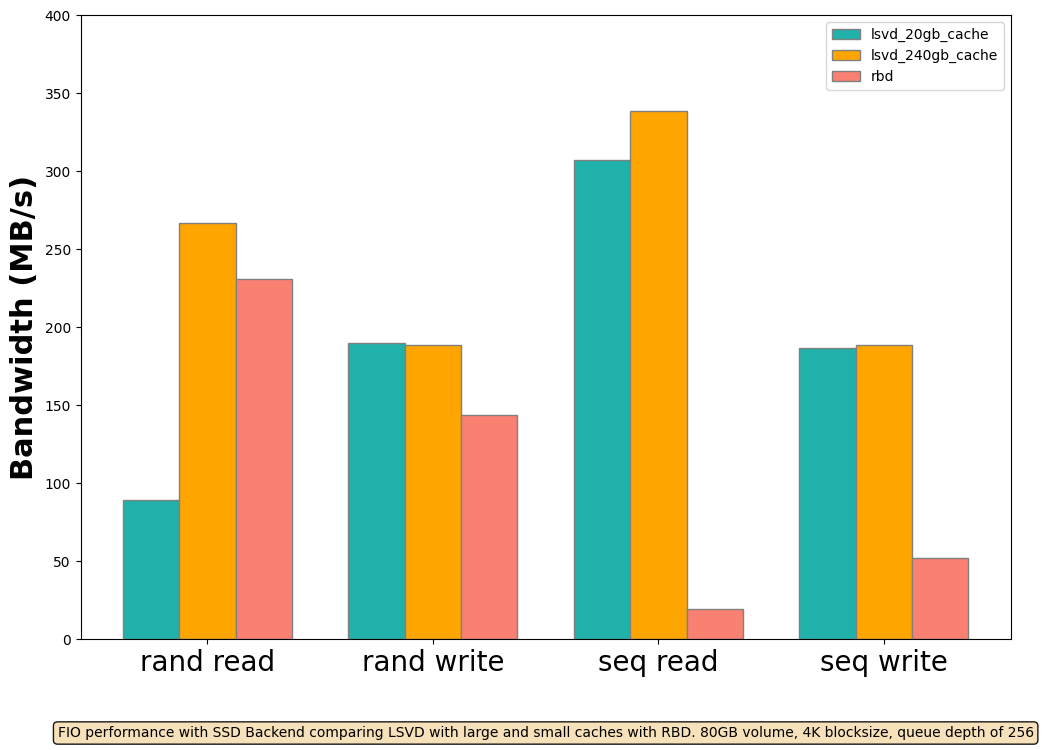

In [42]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# print('lsvd_ssd_bw', lsvd_ssd_bw)
# print('rbd_ssd_bw', rbd_ssd_bw)

xlabel=['rand read', 'rand write', 'seq read', 'seq write']

 
br1 = np.arange(len(lsvd_ssd_bw_20gb1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 
# # Make the plot
plt.bar(br1, lsvd_ssd_bw_20gb1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd_20gb_cache') 
plt.bar(br2, lsvd_ssd_bw_240gb1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='lsvd_240gb_cache') 
plt.bar(br3, rbd_ssd_bw1, color ='salmon', width = barWidth, 
        edgecolor ='grey', label ='rbd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
  
# plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22) 
plt.ylim(0, 400)
plt.xticks([r + barWidth for r in range(len(lsvd_ssd_bw_20gb1))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO performance with SSD Backend comparing LSVD with large and small caches with RBD. 80GB volume, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig(f'request_bw_ssd_{qd}qd.png')
plt.show()



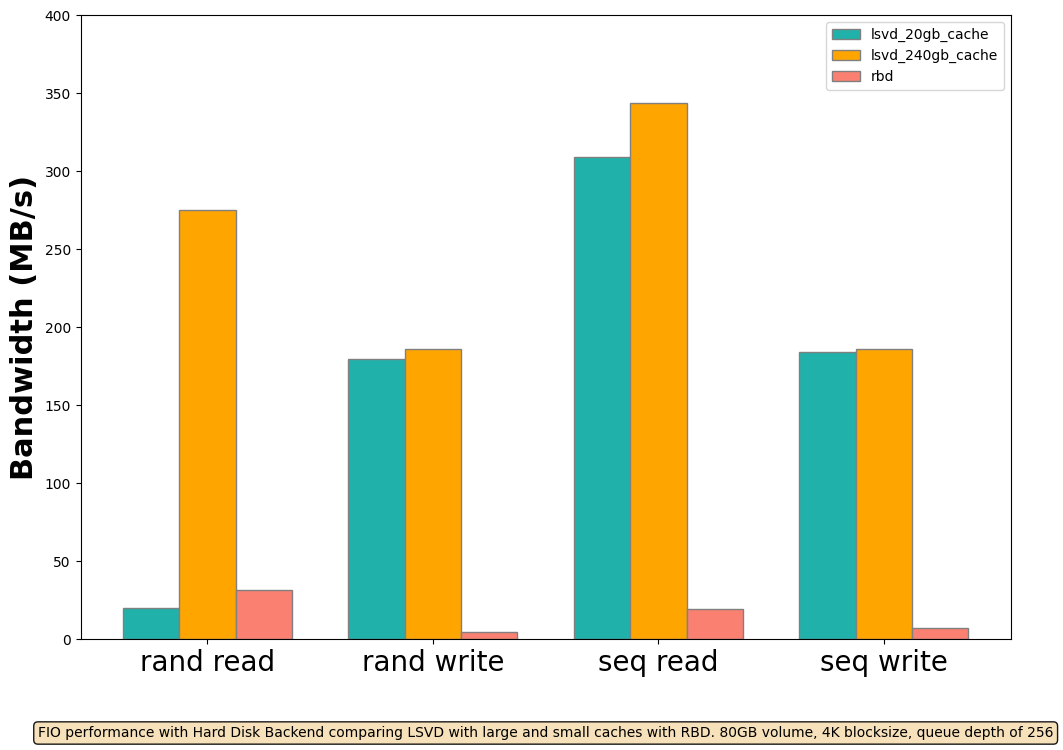

In [43]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# print('lsvd_hdd_bw', lsvd_hdd_bw)
# print('rbd_hdd_bw', rbd_hdd_bw)

xlabel=['rand read', 'rand write', 'seq read', 'seq write']

 
br1 = np.arange(len(lsvd_hdd_bw_20gb1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 
# # Make the plot
plt.bar(br1, lsvd_hdd_bw_20gb1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd_20gb_cache') 
plt.bar(br2, lsvd_hdd_bw_240gb1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='lsvd_240gb_cache') 
plt.bar(br3, rbd_hdd_bw1, color ='salmon', width = barWidth, 
        edgecolor ='grey', label ='rbd')
# plt.bar(br4, rbd_hdd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd') 
  
# plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22) 
plt.ylim(0, 400)
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw_20gb1))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO performance with Hard Disk Backend comparing LSVD with large and small caches with RBD. 80GB volume, 4K blocksize, queue depth of {qd}"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig(f'request_bw_hdd_{qd}qd.png')
plt.show()

In [ ]:
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_ssd_bw', lsvd_ssd_bw)
print('rbd_ssd_bw', rbd_ssd_bw)

 
 
br1 = np.arange(len(lsvd_ssd_bw1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 
# # Make the plot
plt.bar(br1, lsvd_ssd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_ssd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
        edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
  
plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20) 
plt.ylim(0, 400)
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance LSVD vs RBD for SSD backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_ssd_240gb.png')
plt.show()

In [ ]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']


lsvd_ssd_bw=[bw_lsvd_ssd_rr, bw_lsvd_ssd_rw, bw_lsvd_ssd_sr, bw_lsvd_ssd_sw]
lsvd_ssd_bw1 = extract_values(lsvd_ssd_bw)
rbd_ssd_bw=[bw_rbd_ssd_rr, bw_rbd_ssd_rw, bw_rbd_ssd_sr, bw_rbd_ssd_sw]
rbd_ssd_bw1 = extract_values(rbd_ssd_bw)
print(lsvd_ssd_bw, rbd_ssd_bw)


lsvd_hdd_bw=[bw_lsvd_hdd_rr, bw_lsvd_hdd_rw, bw_lsvd_hdd_sr, bw_lsvd_hdd_sw]
lsvd_hdd_bw1 = extract_values(lsvd_hdd_bw)
rbd_hdd_bw=[bw_rbd_hdd_rr, bw_rbd_hdd_rw, bw_rbd_hdd_sr, bw_rbd_hdd_sw]
rbd_hdd_bw1 = extract_values(rbd_hdd_bw)
print(lsvd_hdd_bw, rbd_hdd_bw)

barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

xlabel=['rand read', 'rand write', 'seq read', 'seq write']

ssd_rr = [bw_rbd_ssd_rr, bw_20gb_lsvd_ssd_rr, bw_240gb_lsvd_ssd_rr]
ssd_rr1 = extract_values(ssd_rr)

hdd_rr = [bw_rbd_hdd_rr, bw_20gb_lsvd_hdd_rr, bw_240gb_lsvd_hdd_rr]
hdd_rr1 = extract_values(hdd_rr)

print('ssd_rr', ssd_rr)
print('hdd_rr', hdd_rr)
 
# br1 = np.arange(len(ssd_rr)) 
# br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]

plt.bar(xlabel, ssd_rr, color ='maroon', 
        width = 0.4)
 

# plt.bar(br1, ssd_rr1, color ='lightseagreen', width = barWidth, 
#         edgecolor ='grey', label ='ssd') 
# plt.bar(br2, hdd_rr1, color ='orange', width = barWidth, 
#         edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
# plt.xlabel('Operations', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_rr))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rr_3bar.png')
plt.show()

In [ ]:
plt.bar(courses, values, color ='maroon', 
        width = 0.4)

ssd_rr ['231MiB/s', '89.3MiB/s', '267MiB/s']
hdd_rr ['31.5MiB/s', '20.4MiB/s', '275MiB/s']


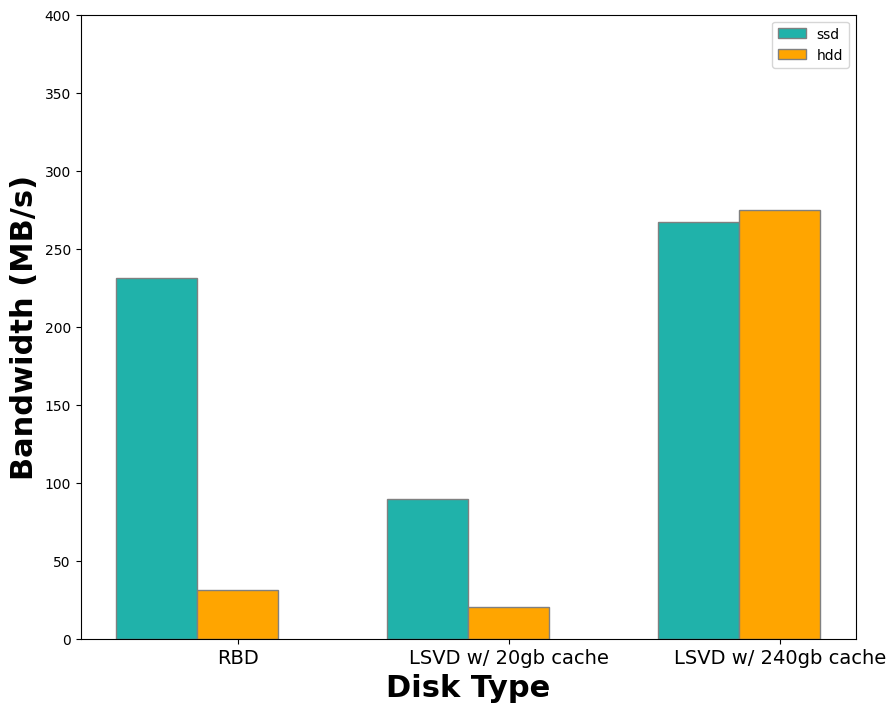

In [13]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_rr = [bw_rbd_ssd_rr, bw_20gb_lsvd_ssd_rr, bw_240gb_lsvd_ssd_rr]
ssd_rr1 = extract_values(ssd_rr)

hdd_rr = [bw_rbd_hdd_rr, bw_20gb_lsvd_hdd_rr, bw_240gb_lsvd_hdd_rr]
hdd_rr1 = extract_values(hdd_rr)

print('ssd_rr', ssd_rr)
print('hdd_rr', hdd_rr)
 
br1 = np.arange(len(ssd_rr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_rr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_rr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_rr))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rr_3bar.png')
plt.show()

ssd_rw ['144MiB/s', '190MiB/s', '189MiB/s']
hdd_rw ['4907KiB/s', '180MiB/s', '186MiB/s']


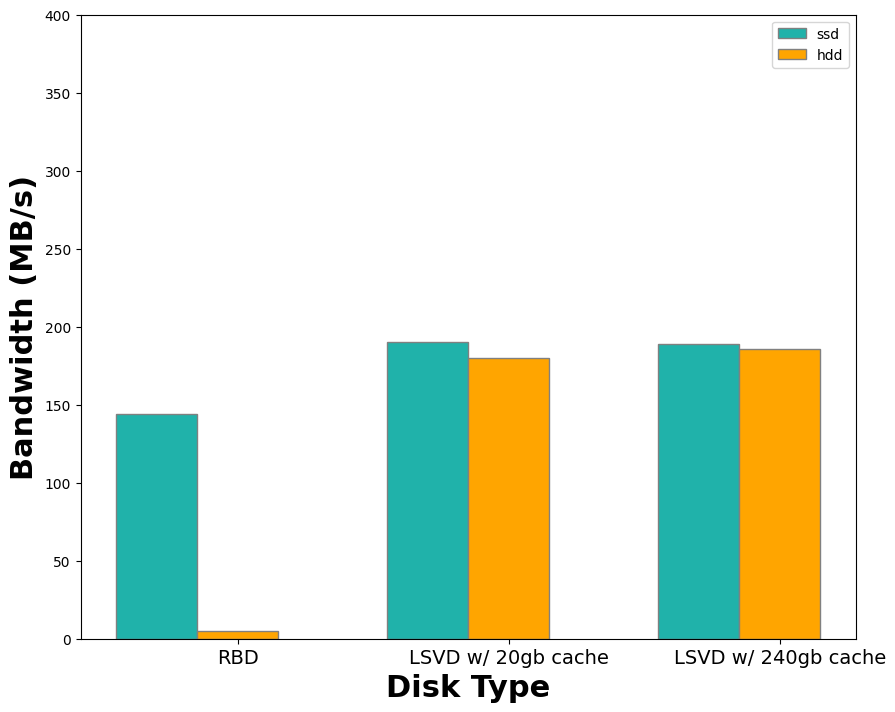

In [14]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_rw = [bw_rbd_ssd_rw, bw_20gb_lsvd_ssd_rw, bw_240gb_lsvd_ssd_rw]
ssd_rw1 = extract_values(ssd_rw)
hdd_rw = [bw_rbd_hdd_rw, bw_20gb_lsvd_hdd_rw, bw_240gb_lsvd_hdd_rw]
hdd_rw1 = extract_values(hdd_rw)

print('ssd_rw', ssd_rw)
print('hdd_rw', hdd_rw)
 
br1 = np.arange(len(ssd_rw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_rw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_rw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_rw))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rw_3bar.png')
plt.show()

ssd_sr ['19.4MiB/s', '307MiB/s', '339MiB/s']
hdd_sr ['19.8MiB/s', '309MiB/s', '344MiB/s']


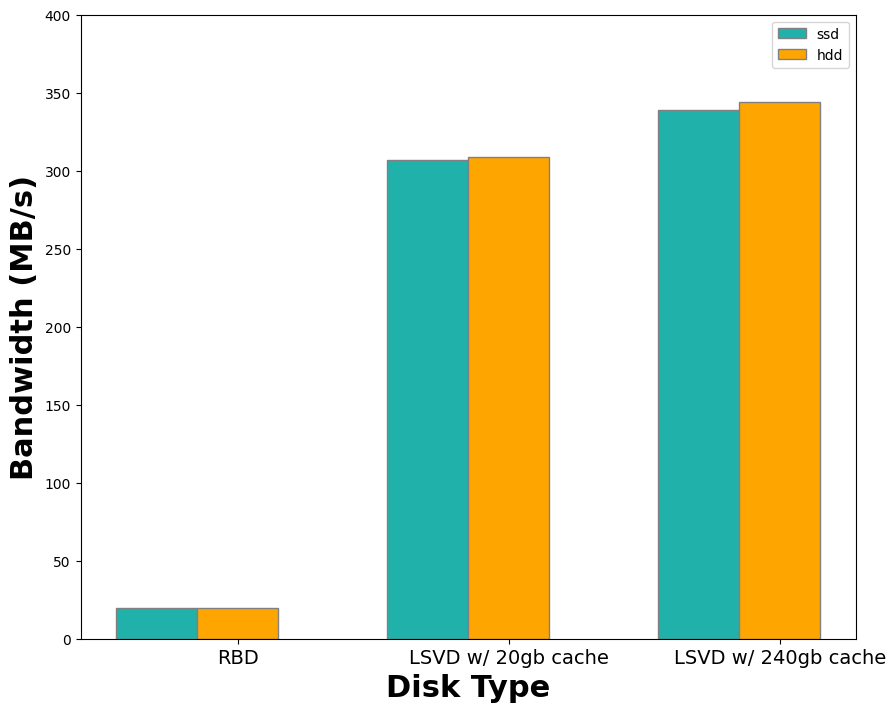

In [15]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_sr = [bw_rbd_ssd_sr, bw_20gb_lsvd_ssd_sr, bw_240gb_lsvd_ssd_sr]
ssd_sr1 = extract_values(ssd_sr)
hdd_sr = [bw_rbd_hdd_sr, bw_20gb_lsvd_hdd_sr, bw_240gb_lsvd_hdd_sr]
hdd_sr1 = extract_values(hdd_sr)

print('ssd_sr', ssd_sr)
print('hdd_sr', hdd_sr)
 
br1 = np.arange(len(ssd_sr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_sr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_sr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_sr))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sr_3bar.png')
plt.show()

ssd_sw ['52.3MiB/s', '187MiB/s', '189MiB/s']
hdd_sw ['7194KiB/s', '184MiB/s', '186MiB/s']


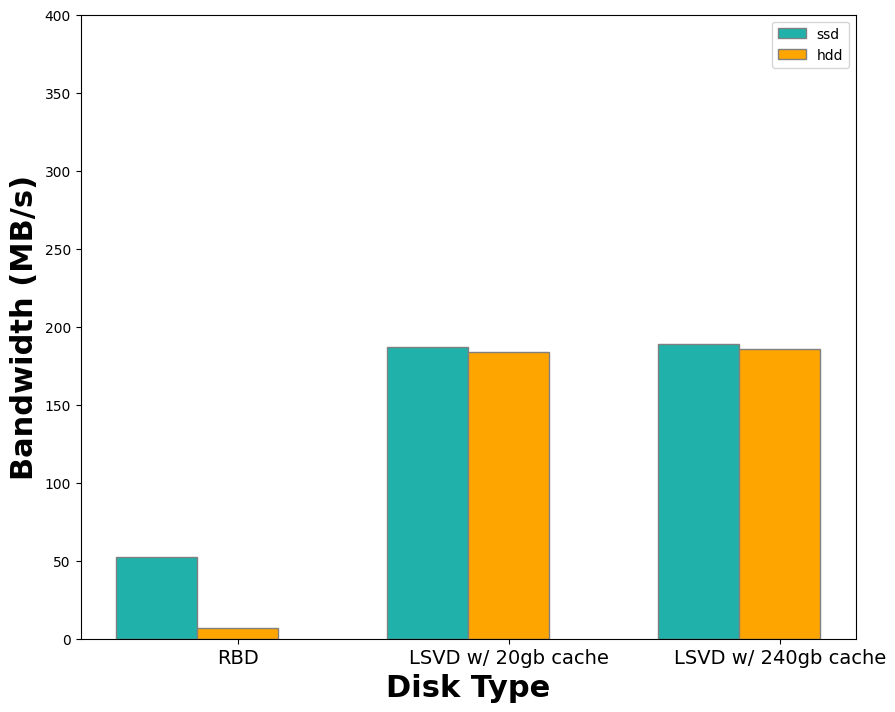

In [16]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_sw = [bw_rbd_ssd_sw, bw_20gb_lsvd_ssd_sw, bw_240gb_lsvd_ssd_sw]
ssd_sw1 = extract_values(ssd_sw)
hdd_sw = [bw_rbd_hdd_sw, bw_20gb_lsvd_hdd_sw, bw_240gb_lsvd_hdd_sw]
hdd_sw1 = extract_values(hdd_sw)

print('ssd_sw', ssd_sw)
print('hdd_sw', hdd_sw)
 
br1 = np.arange(len(ssd_sw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_sw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_sw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_sw))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sw_3bar.png')
plt.show()